In [ ]:
#Install the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

#**Data Collection and Loading**

In [ ]:
# Load data into analysis enviroment
df = pd.read_csv("data.csv")
df.head()

y = df['cancer_type'] #Seperate the label column from th remaining features
df = df.drop(columns=['cancer_type'],axis=1) #drop the label column from the dataset

<ipython-input-2-38f6f115b100>:2: DtypeWarning: Columns (662,664,676,677,683,685,686,687) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


#**Data Understanding**

In [ ]:
#Examine data types
df.info()
#We have coulmns which include integers, floats, and strings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496 entries, 0 to 1495
Columns: 687 entries, patient_id to siah1_mut
dtypes: float64(496), int64(7), object(184)
memory usage: 7.8+ MB


In [ ]:
#First we drop the patient_id column since it is not relevant to the output
df = df.drop("patient_id",axis=1)

In [ ]:
#Calculate the measures of the first 24 columns, since the following columns have no numerical meaning
df.iloc[:,:24].describe()

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,tumor_size,tumor_stage
count,1496.000000,1496.000000,1496.00000,1444.000000,1496.000000,1496.000000,1465.000000,1496.000000,1496.000000,1496.000000,1496.000000,1484.000000,1101.000000
mean,60.837701,0.208556,2.65107,2.413435,0.623663,2.025401,5.761775,4.041127,127.449933,0.426471,0.599599,26.120398,1.742961
std,12.900024,0.406412,1.23002,0.653462,0.484628,4.031733,4.235862,1.141836,76.217137,0.494729,0.490143,15.045834,0.622501
min,26.360000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,1.020000,0.100000,0.000000,0.000000,1.000000,0.000000
25%,51.320000,0.000000,2.00000,2.000000,0.000000,0.000000,3.000000,3.048000,63.425000,0.000000,0.000000,17.000000,1.000000
50%,61.305000,0.000000,3.00000,3.000000,1.000000,0.000000,5.000000,4.042000,117.883333,0.000000,1.000000,23.000000,2.000000
75%,70.302500,0.000000,3.00000,3.000000,1.000000,2.000000,7.000000,5.042000,186.550000,1.000000,1.000000,30.000000,2.000000
max,92.140000,1.000000,5.00000,3.000000,1.000000,45.000000,80.000000,6.360000,355.200000,1.000000,1.000000,182.000000,4.000000


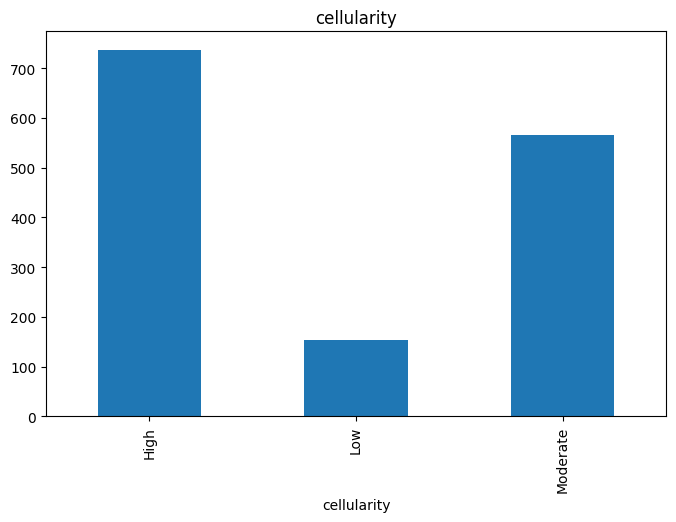

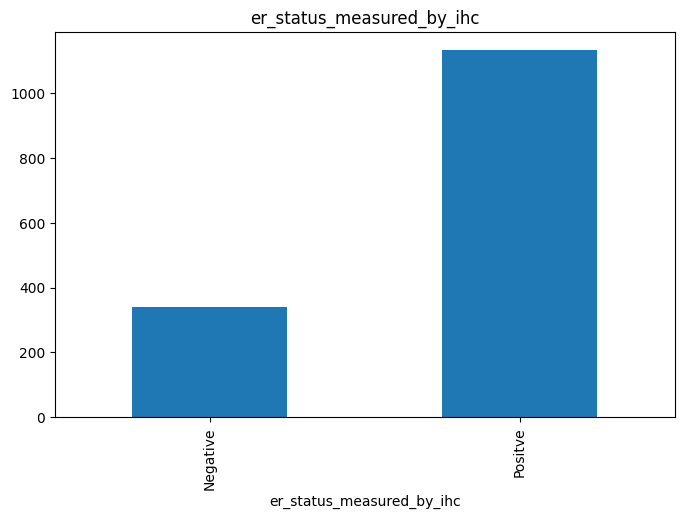

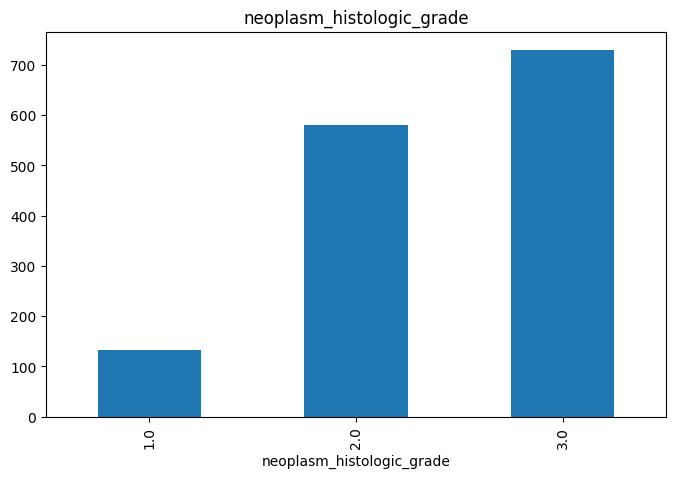

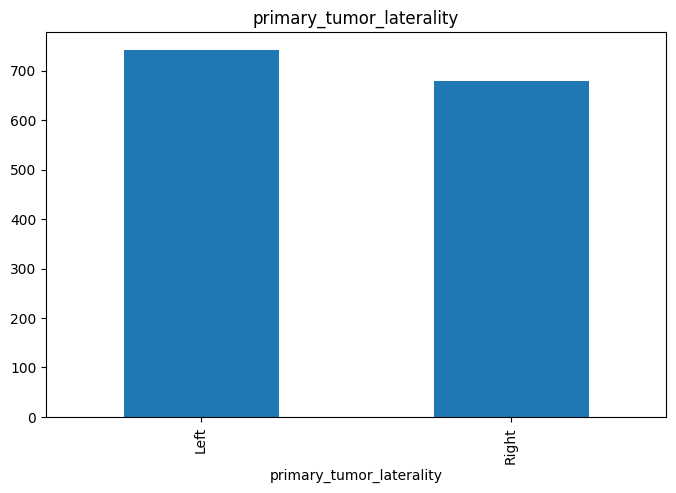

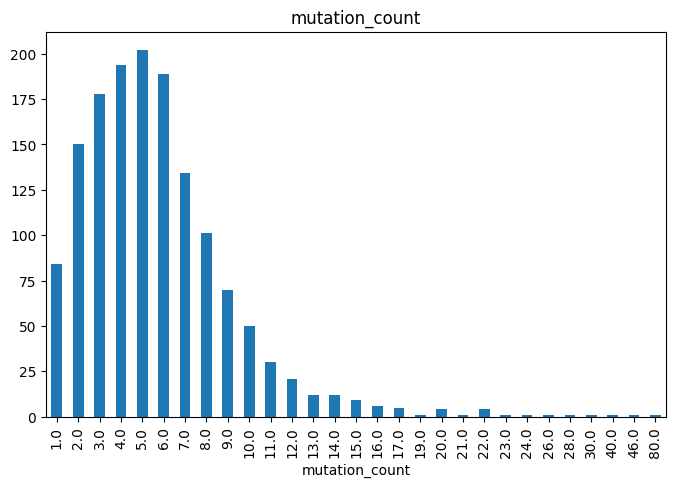

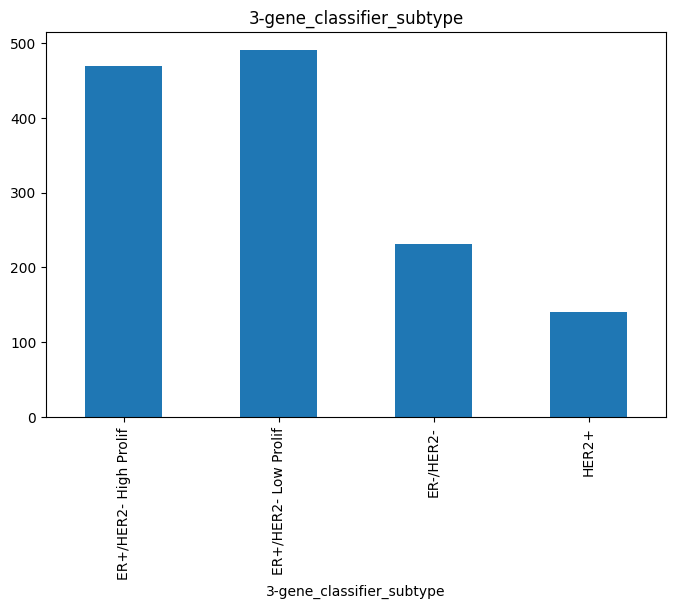

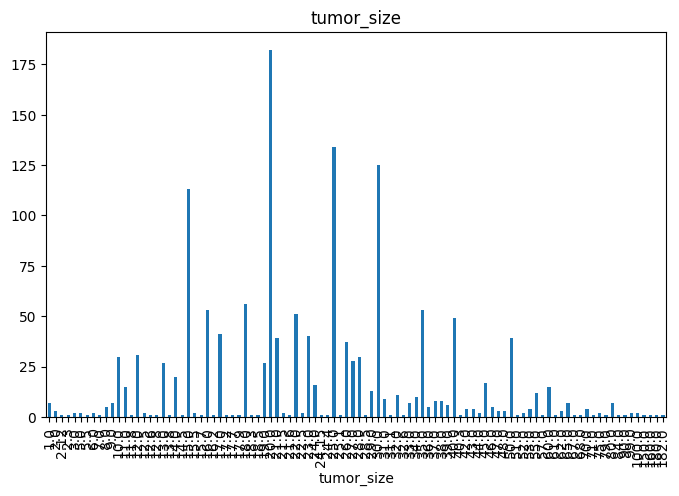

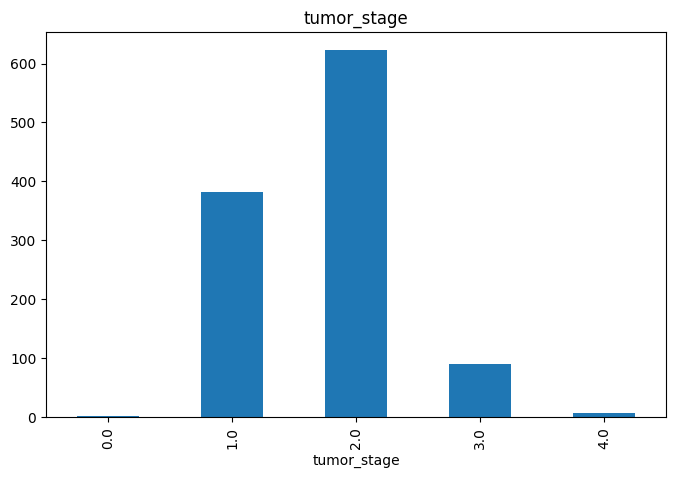

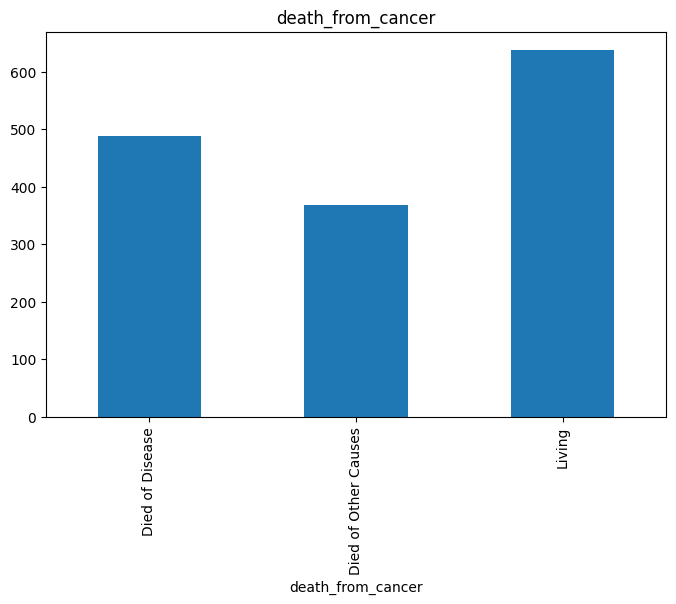

In [ ]:
#Analyze distribution of variables (Categorical features)
cols_to_plot = ['cellularity','er_status_measured_by_ihc','neoplasm_histologic_grade','primary_tumor_laterality','mutation_count','3-gene_classifier_subtype','tumor_size','tumor_stage','death_from_cancer']
for col in cols_to_plot:
    df[col].value_counts().sort_index().plot(kind='bar', figsize=(8, 5))
    plt.title(col)
    plt.show()

In [ ]:
#Here we check which columns are categorical
for i in range(len(cols_to_plot)):
    if(len(df[cols_to_plot[i]].unique()) < 5):
        print(cols_to_plot[i])

cellularity
er_status_measured_by_ihc
neoplasm_histologic_grade
primary_tumor_laterality
death_from_cancer


# **Data Cleaning**

In the below section, as you may notice, we filled the missing values for some of the features manually.This is because some of the features are cateorical of type integer, so if we fill the missing values for all integer column with the mean of the column, the categorical column will be in error.<br>
Let's take the chemotherapy column: this is a categorical column with values either 1 (patient did undergo chemotherapy) or 0 (patient did not undergo any chemotherapy), in this case we cannot apply the mean because no patient can undergo 0.2 chemotherapy (if the mean is 0.2).<br>
Note: The same argument applies for the columns with type float where the missing values were filled manually.

In [ ]:
#Check which columns have missing values and print the column name with their corresponding number of empty entries
cols = df.columns.tolist() #get all column names into a list
for i in range(len(cols)):
    if(df[cols[i]].isna().sum() > 0 ): #df[cols[i]].isna() return a list where each index contains the value of na's in the correpsonding column
                                       # for e.g: [False,False,True,..] this means the first 2 rows are not missing and the third row is missing
                                       # Thus .sum() gives how any values are missing in the corresponding column
      print(cols[i] + " "+str(df[cols[i]].isna().sum()))

#Categorical
df['primary_tumor_laterality'] = df['primary_tumor_laterality'].fillna(df['primary_tumor_laterality'].mode()[0])
df['death_from_cancer'] = df['death_from_cancer'].fillna(df['death_from_cancer'].mode()[0])
df['cellularity'] = df['cellularity'].fillna(df['cellularity'].mode()[0])
df['er_status_measured_by_ihc'] = df['er_status_measured_by_ihc'].fillna(df['er_status_measured_by_ihc'].mode()[0])
df['neoplasm_histologic_grade'] = df['neoplasm_histologic_grade'].fillna(df['neoplasm_histologic_grade'].mode()[0])
df['3-gene_classifier_subtype'] = df['3-gene_classifier_subtype'].fillna(df['3-gene_classifier_subtype'].mode()[0])
df['tumor_stage'] = df['tumor_stage'].astype('category')

#Numerical
df['tumor_size'] = df['tumor_size'].fillna(df['tumor_size'].mean())
df['mutation_count'] = df['mutation_count'].fillna(df['mutation_count'].mean().round())


cellularity 40
er_status_measured_by_ihc 23
neoplasm_histologic_grade 52
primary_tumor_laterality 76
mutation_count 31
3-gene_classifier_subtype 166
tumor_size 12
tumor_stage 395
death_from_cancer 1


In the above section, we printed how many missing values all the column have (only the columns with missing values). As we notice, ***tumor_stage*** is the column with the most missing values, thus we cannot replace all the missing values with the mode of the column since it will generate a great imbalance within this column. Therefore we apply KNN(K-nearest neighbor).In order th apply KNN to this column, we must have a complete dataset with no missing values, thus we replaced all the missing values in the caterorical columns with the mode of the column in order to apply KNN to ***tumor_stage*** (the column with the most missing values). <br>
First of all, we need to encode the data for KNN to work.

In [ ]:
#Here we encode the data, some columns require different encoding than others.
cellularity_mapping = {'Low': 1, 'Moderate': 2, 'High': 3} #give Higher cellularity a higher number
df['cellularity'] = df['cellularity'].map(cellularity_mapping)

encode = LabelEncoder()
df['pam50_+_claudin-low_subtype'] = encode.fit_transform(df['pam50_+_claudin-low_subtype'])
df['er_status_measured_by_ihc'] = encode.fit_transform(df['er_status_measured_by_ihc'])
df['er_status'] = encode.fit_transform(df['er_status'])

her2_status_measured_by_snp6_mapping = {'LOSS': 1, 'NEUTRAL': 2, 'GAIN': 3, 'UNDEF': 0}
df['he[r2_status_measured_by_snp6'] = df['her2_status_measured_by_snp6'].map(her2_status_measured_by_snp6_mapping)
df['her2_status'] = encode.fit_transform(df['her2_status'])
df['inferred_menopausal_state'] = encode.fit_transform(df['inferred_menopausal_state'])
df['primary_tumor_laterality'] = encode.fit_transform(df['primary_tumor_laterality'])
df['pr_status'] = encode.fit_transform(df['pr_status'])

# One-hot encode specific columns
df = pd.get_dummies(df, columns=['3-gene_classifier_subtype', 'death_from_cancer']) #get_dummies: creates new columns for each class in the column

# Encode remaining categorical columns
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        # Create a label encoder for each categorical column
        le = LabelEncoder()
        # Fit the label encoder and transform the df
        df[column] = le.fit_transform(df[column].astype(str))
        # Store the label encoder in a dictionary for potential later use
        label_encoders[column] = le

In [ ]:
# Apply KNN imputation on 'tumor_stage' (column with most missing values)
imputed_data = KNNImputer(n_neighbors=4).fit_transform(df)
imputed_df = pd.DataFrame(imputed_data, columns=df.columns, index=df.index)
imputed_df['tumor_stage'] = imputed_df['tumor_stage'].round()

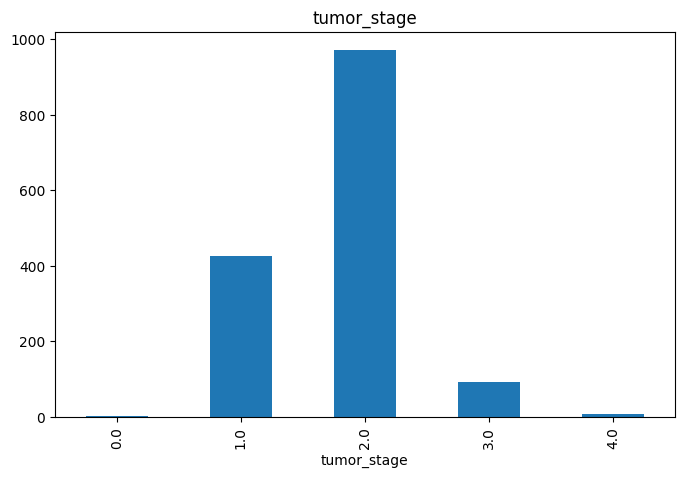

In [ ]:
imputed_df['tumor_stage'].value_counts().sort_index().plot(kind='bar', figsize=(8, 5))
plt.title('tumor_stage')
plt.show()

In [ ]:
#Eliminating duplicate records
df.drop_duplicates()

,age_at_diagnosis,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,...,stmn2_mut,siah1_mut,he[r2_status_measured_by_snp6,3-gene_classifier_subtype_ER+/HER2- High Prolif,3-gene_classifier_subtype_ER+/HER2- Low Prolif,3-gene_classifier_subtype_ER-/HER2-,3-gene_classifier_subtype_HER2+,death_from_cancer_Died of Disease,death_from_cancer_Died of Other Causes,death_from_cancer_Living
0,54.29,3,1,3,1,1,1,3.0,2,0,...,0,0,2,True,False,False,False,True,False,False
1,43.45,2,0,2,4,1,1,1.0,1,0,...,0,0,1,False,True,False,False,False,False,True
2,74.11,3,0,3,3,1,1,3.0,2,0,...,0,0,2,True,False,False,False,True,False,False
3,51.87,3,0,2,3,1,1,2.0,2,0,...,0,0,2,False,True,False,False,False,False,True
4,87.18,2,0,3,1,1,1,3.0,0,1,...,0,0,3,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,50.08,2,0,6,3,1,1,3.0,2,0,...,0,0,2,False,True,False,False,False,True,False
1492,60.99,3,0,1,3,1,1,3.0,2,0,...,0,0,2,False,True,False,False,False,True,False
1493,83.39,2,0,0,4,1,1,3.0,2,0,...,0,0,2,True,False,False,False,False,True,False
1494,60.63,3,0,3,4,1,1,3.0,2,0,...,0,0,2,True,False,False,False,False,False,True


#**Data Balancing**

In the below, y represents the the labels of the dataset. As we can notice, there is a major imbalance in the dataset where the class ***Breast Invasive Mixed Mucinous Carcinoma*** represents only around 1.2% of the dataset and the class ***Breast Invasive Ductal Carcinoma*** represents around 80% of the whole dataset!<br>
This significant imbalance must dealt with to prevent a high bias in the model.

In [ ]:
y.value_counts()

,count
cancer_type,
Breast Invasive Ductal Carcinoma,1199
Breast Mixed Ductal and Lobular Carcinoma,165
Breast Invasive Lobular Carcinoma,114
Breast Invasive Mixed Mucinous Carcinoma,18


In [ ]:
def undersample_data(data):
    #Dataset is divided into its subsets based on the cancer_type labels.
    data_majority = data[data.cancer_type == 'Breast Invasive Ductal Carcinoma']
    data_minority_1 = data[data.cancer_type == 'Breast Mixed Ductal and Lobular Carcinoma']
    data_minority_2 = data[data.cancer_type == 'Breast Invasive Lobular Carcinoma']
    data_minority_3 = data[data.cancer_type == 'Breast Invasive Mixed Mucinous Carcinoma']

    # Undersample the majority class to match the size of the largest minority class
    data_majority_downsampled = resample(data_majority,
                                         replace=False,  # sample without replacement
                                         n_samples=900,  # to match minority class size
                                         random_state=42)  # reproducible results

    data_minority_1 = resample(data_minority_1,replace=True,n_samples=400,random_state=123)
    data_minority_2 = resample(data_minority_2,replace=True,n_samples=400,random_state=123)
    data_minority_3 = resample(data_minority_3,replace=True,n_samples=400,random_state=123)
    # Combine minority class with downsampled majority class
    balanced_data = pd.concat([data_majority_downsampled, data_minority_1, data_minority_2, data_minority_3])

    # Reset index to avoid index duplication
    balanced_data.reset_index(drop=True, inplace=True)
    return balanced_data


balanced_df = undersample_data(pd.concat([y, imputed_df], axis=1)) #We provide the whole dataset

The above function aims to create a more balanced dataset from the imbalance it has. Since there exists a significant class imbalance we implemented a dual approach in which we oversampled the minority class and undersampled the majority class.

#**Pattern Identification**<br>


If we observe the columns ***brca1*** till ***ugt2b7***, we notice that all these column have non-meaningful numbers, applying **PCA** (Principal Component Analysis) can reduce the number of features while retaining most of the relevant information.

In [ ]:
# First we get the indices of the columns on which PCA (next cell) will be applied.
start_index = balanced_df.columns.get_loc('brca1') #get the index of the first column
end_index = balanced_df.columns.get_loc('ugt2b7') #get the index of the last column

subset = balanced_df.iloc[:,start_index:end_index+1] #get all the columns for the PCA application

In [ ]:
# Here we apply PCA
pca = PCA(n_components=8) #how many principal components (how many columns)
principal_components = pca.fit_transform(subset) #fit the PCA model
principalDf = pd.DataFrame(data = principal_components
             , columns = [f'pc{i+1}' for i in range(8)])
balanced_df.drop(balanced_df.columns[start_index+1:end_index+1],axis=1,inplace=True) #drop the old columns

balanced_df = pd.concat([balanced_df,principalDf],axis=1) #append the new prinicpal components to the dataset

#**Modeling and Preparation**

In [ ]:
# After performing all the necessary changes (feature engineering, balancing, cleaning,...)
# We split the data into train, validate, and test data
y = balanced_df['cancer_type']
X_train,X_temp,y_train,y_temp = train_test_split(balanced_df.drop(columns=['cancer_type'],axis=1),y,test_size=0.2,random_state=42,stratify=y)
X_test,X_val,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=42,stratify=y_temp)


#**Documentation and Reporting**

## Data Overview

- **Number of records:** 1496
- **Number of features:** 688
- **Target variable:** cancer_type



#Label Counts (Percentages of the dataset)
We get the labels counts by using a simple function called **.value_counts()** which gives us the frequency of each class in the labels column.
- Breast Invasive Ductal Carcinoma : **1199** (80.1%)
- Breast Mixed Ductal and Lobular Carcinoma : **165** (11.1%)
- Breast Invasive Lobular Carcinoma : **114** (7.6%)
- Breast Invasive Mixed Mucinous Carcinoma : **18** (1.2%)


## Data Cleaning and Preprocessing

- **Missing values:** Handled using mode imputation for categorical features and mean imputation for numerical features.
- **Categorical features:** Encoded using label encoding and **pandas.get_dummies()**.
- **Data balancing:** Undersampling and oversampling techniques applied to address class imbalance.
- **Feature engineering:** Principal Component Analysis (PCA) used to reduce dimensionality.

The following table presents the mean values of selected features by using the **.mean()** function:

| Feature                    | Mean Value |
|----------------------------|------------|
| age_at_diagnosis          | 62.11      |
| cellularity                | 2.33      |
| chemotherapy               | 0.15      |
| cohort                     | 2.64      |
| neoplasm_histologic_grade  | 2.23      |
| hormone_therapy            | 0.65      |
| inferred_menopausal_state  | 0.20      |
| primary_tumor_laterality   | 0.48      |
| lymph_nodes_examined_positive| 1.63      |
| mutation_count             | 5.73      |
| nottingham_prognostic_index| 3.75      |
| overall_survival_months    | 128.87     |
| overall_survival           | 0.45      |
| pr_status                  | 0.55      |
| radio_therapy              | 0.56      |
| tumor_size                | 26.65      |
| tumor_stage                | 1.73      |

